In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten, Reshape, MaxPooling1D
import matplotlib.pyplot as plt

<h2>Training with just 200 samples without preprocessing</h2>

In [3]:
inputs = []
targets = []

In [4]:
for i in range(52):
    with open('dataset/data' + str(i) + '.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['dfts']
        targets = targets + data['peakFreqs']

In [10]:
inputs = np.array(inputs)
targets = np.array(targets)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.2)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
test = X_train[0]

In [7]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(232, 1)

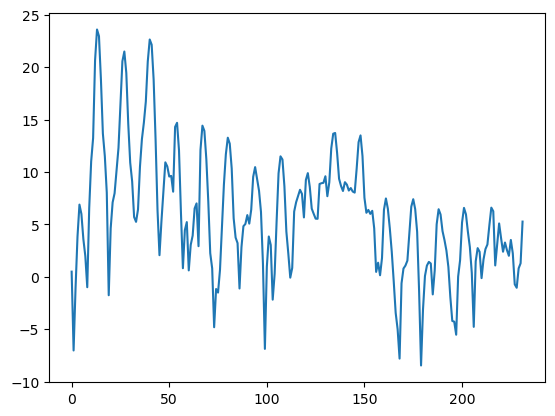

In [11]:
plt.plot(X_train[0])

In [30]:
model = Sequential()

model.add(LSTM(units=230, activation='tanh', return_sequences=True, input_shape=input_shape))

model.add(Conv1D(filters=232, kernel_size=15, activation='relu' ))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=232, kernel_size=9, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='linear'))

In [31]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 232, 230)          213440    
                                                                 
 conv1d_10 (Conv1D)          (None, 218, 232)          800632    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 109, 232)         0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 101, 232)          484648    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 50, 232)          0         
 g1D)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 44, 128)          

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=50, batch_size=32)

Epoch 1/50
6/6 [==============================] - 4s 466ms/step - loss: 866772.3125 - val_loss: 880718.1875
Epoch 2/50
6/6 [==============================] - 2s 374ms/step - loss: 866070.4375 - val_loss: 878626.0625
Epoch 3/50
6/6 [==============================] - 2s 374ms/step - loss: 863710.6250 - val_loss: 871942.5625
Epoch 4/50
6/6 [==============================] - 2s 380ms/step - loss: 857367.8125 - val_loss: 852702.8125
Epoch 5/50
6/6 [==============================] - 2s 403ms/step - loss: 842826.5625 - val_loss: 805905.0625
Epoch 6/50
6/6 [==============================] - 2s 389ms/step - loss: 813587.8750 - val_loss: 717518.4375
Epoch 7/50
6/6 [==============================] - 2s 379ms/step - loss: 773648.0625 - val_loss: 663192.3125
Epoch 8/50
6/6 [==============================] - 2s 369ms/step - loss: 781680.7500 - val_loss: 688790.1250
Epoch 9/50
6/6 [==============================] - 2s 361ms/step - loss: 780448.4375 - val_loss: 713144.5000
Epoch 10/50
6/6 [===========

In [35]:
fs = 44100
N = 4096

In [36]:
prediction = model.predict(X_test)

2/2 [==============================] - 0s 88ms/step


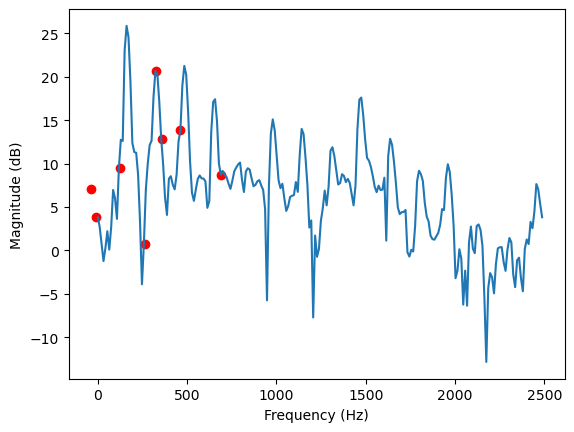

In [37]:
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.plot(np.arange(len(X_test[40])) * 44100 / 4096, X_test[40])
plt.scatter(prediction[40], [X_test[40][int(i * N / fs)] for i in prediction[40]], c='r')